<a href="https://colab.research.google.com/github/younghoonNa/Kaggle_Data_analysis/blob/main/R_%EC%BC%80%EA%B8%80_%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ** 실습 과제2 <11주차 과제 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project2.ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2021.11.08(월요일) ~ 2021.11.14(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -



### **1. 다음의 서울 자전거 공유 수요 데이터 세트 테이터를 사용하여 Rented Bike count를 반응변수(종속변수)로 하는 ``단순회귀분석(Simple Linear Regression)``과 ``다중회귀분석(Multiple Linear Regression)``을 실습자료의 ``예제1과 예제2 유사한 방식``으로 진행하시오.**

``* 단순회귀분석 50점, 다중회귀분석 50점``

**<서울 자전거 공유 수요 데이터 세트>**

  * Date : year-month-day
  * Rented Bike count - Count of bikes rented at each hour
  * Hour - Hour of he day
  * Temperature-Temperature in Celsius
  * Humidity - %
  * Windspeed - m/s
  * Visibility - 10m
  * Dew point temperature - Celsius
  * Solar radiation - MJ/m2
  * Rainfall - mm
  * Snowfall - cm
  * Seasons - Winter, Spring, Summer, Autumn
  * Holiday - Holiday/No holiday
  * Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명
2. scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명
3. 적절한 반응변수와 설명변수의 섫정
4. Train / Test set 분리 후 회귀식 추정
5. 회귀분석 결과 해석
6. Feature selection(변수 선택)
7. Test set을 이용한 Predict(예측)
```



In [ ]:
install.packages(c("tidyverse", "data.table", "caret"))
library(tidyverse)
library(data.table)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("PerformanceAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 출력 그래프 크기 변경
library(repr)
options(repr.plot.width=10, repr.plot.height=10)

In [ ]:
bike <- read.csv("/content/sample_data/SeoulBikeData.csv")
str(bike)

'data.frame':	8760 obs. of  14 variables:
 $ Date                 : chr  "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ Rented.Bike.Count    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Hour                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ Wind.speed           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ Dew.point.temperature: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ Solar.Radiation      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ Functioning

### **1-1. 단순회귀분석 (50점)**

* 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명

```
가장 중요하다고 생각되는 특징 3개만 뽑아서 진행하였습니다.

Rented.Bike.Count : 시간마다 렌트 된 바이크의 수
Hour : 시간대
Temperature : 섭씨 온도
Humidity : 습도
```

* scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명

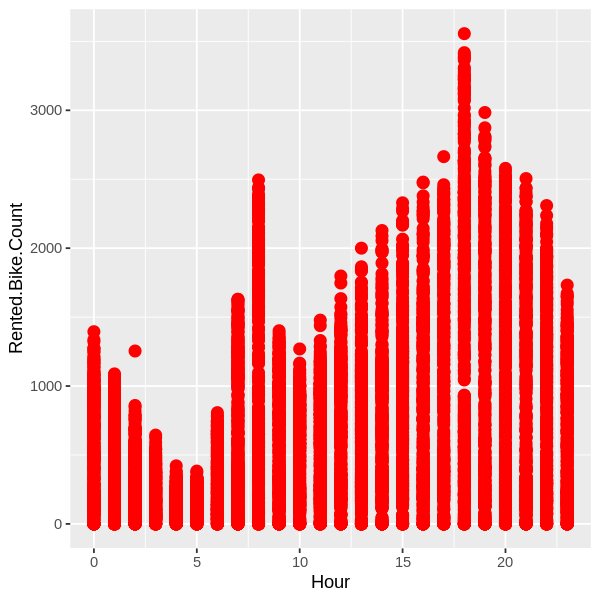

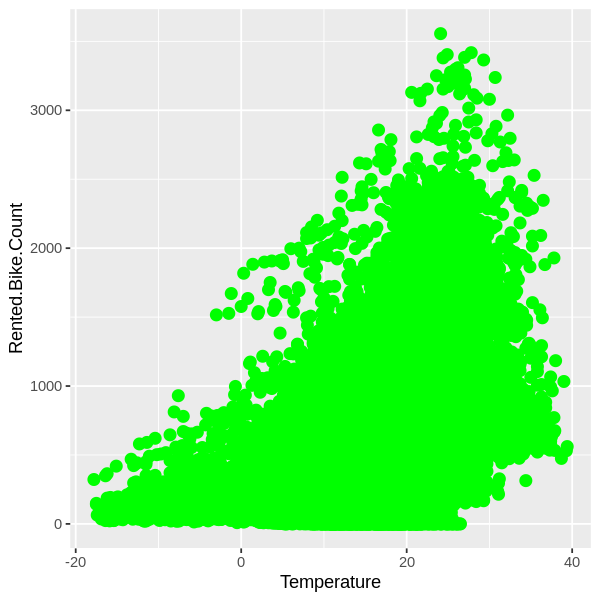

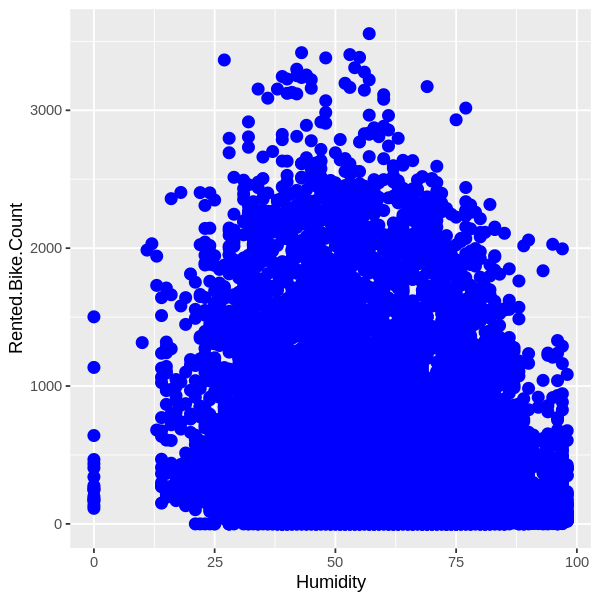

In [ ]:
# "scatterplot3d", "plotly","PerformanceAnalytics", "boxplot" 활용
options(repr.plot.width=5, repr.plot.height=5)

#ggplot의 geom_point를 통해 각각 Hour, Temperature, Humidity의 상관관계를 그려보았습니다. 
#Hour과 Rented.bike.count의 관계는 특정 시간에 바이크를 많이 탄다는 것을 볼 수 있으며, 
#기온 또한 높아질 수록 바이크 렌트의 수가 많아진 다는 것을 알 수 있습니다.
#즉 hour와 Temperature은 상관관계가 약간 있다고 보이나, Humidity의 경우 상관관계가 없는 것처럼 보입니다.
bike %>% ggplot(aes(x = Hour, y = Rented.Bike.Count)) + geom_point(size = 3, color = "red")
bike %>% ggplot(aes(x = Temperature, y = Rented.Bike.Count)) + geom_point(size = 3, color = "green")
bike %>% ggplot(aes(x = Humidity, y = Rented.Bike.Count)) + geom_point(size = 3, color = "blue")

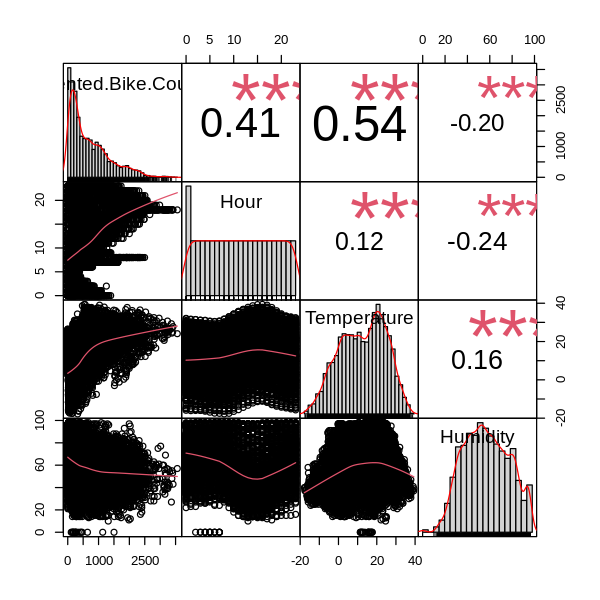

In [ ]:
linear_bike_model <- bike %>% select(Rented.Bike.Count, Hour, Temperature, Humidity)
PerformanceAnalytics::chart.Correlation(linear_bike_model, histogram = TRUE, pch = 19)
#PerformanceAnalytics로 그래프를 그려보기 위해 bike_model에서 단순선형회기에 뽑힌 특징 3개를 따로 뽑았습니다.
#1번째 열을 보면 1,1 은 자기 자신의 분포도를 나타내며, 그 아래 행들은 시간,온도,습도 순으로 렌트된 바이크 수와의 관계를 그래프로 보여주고 있습니다.

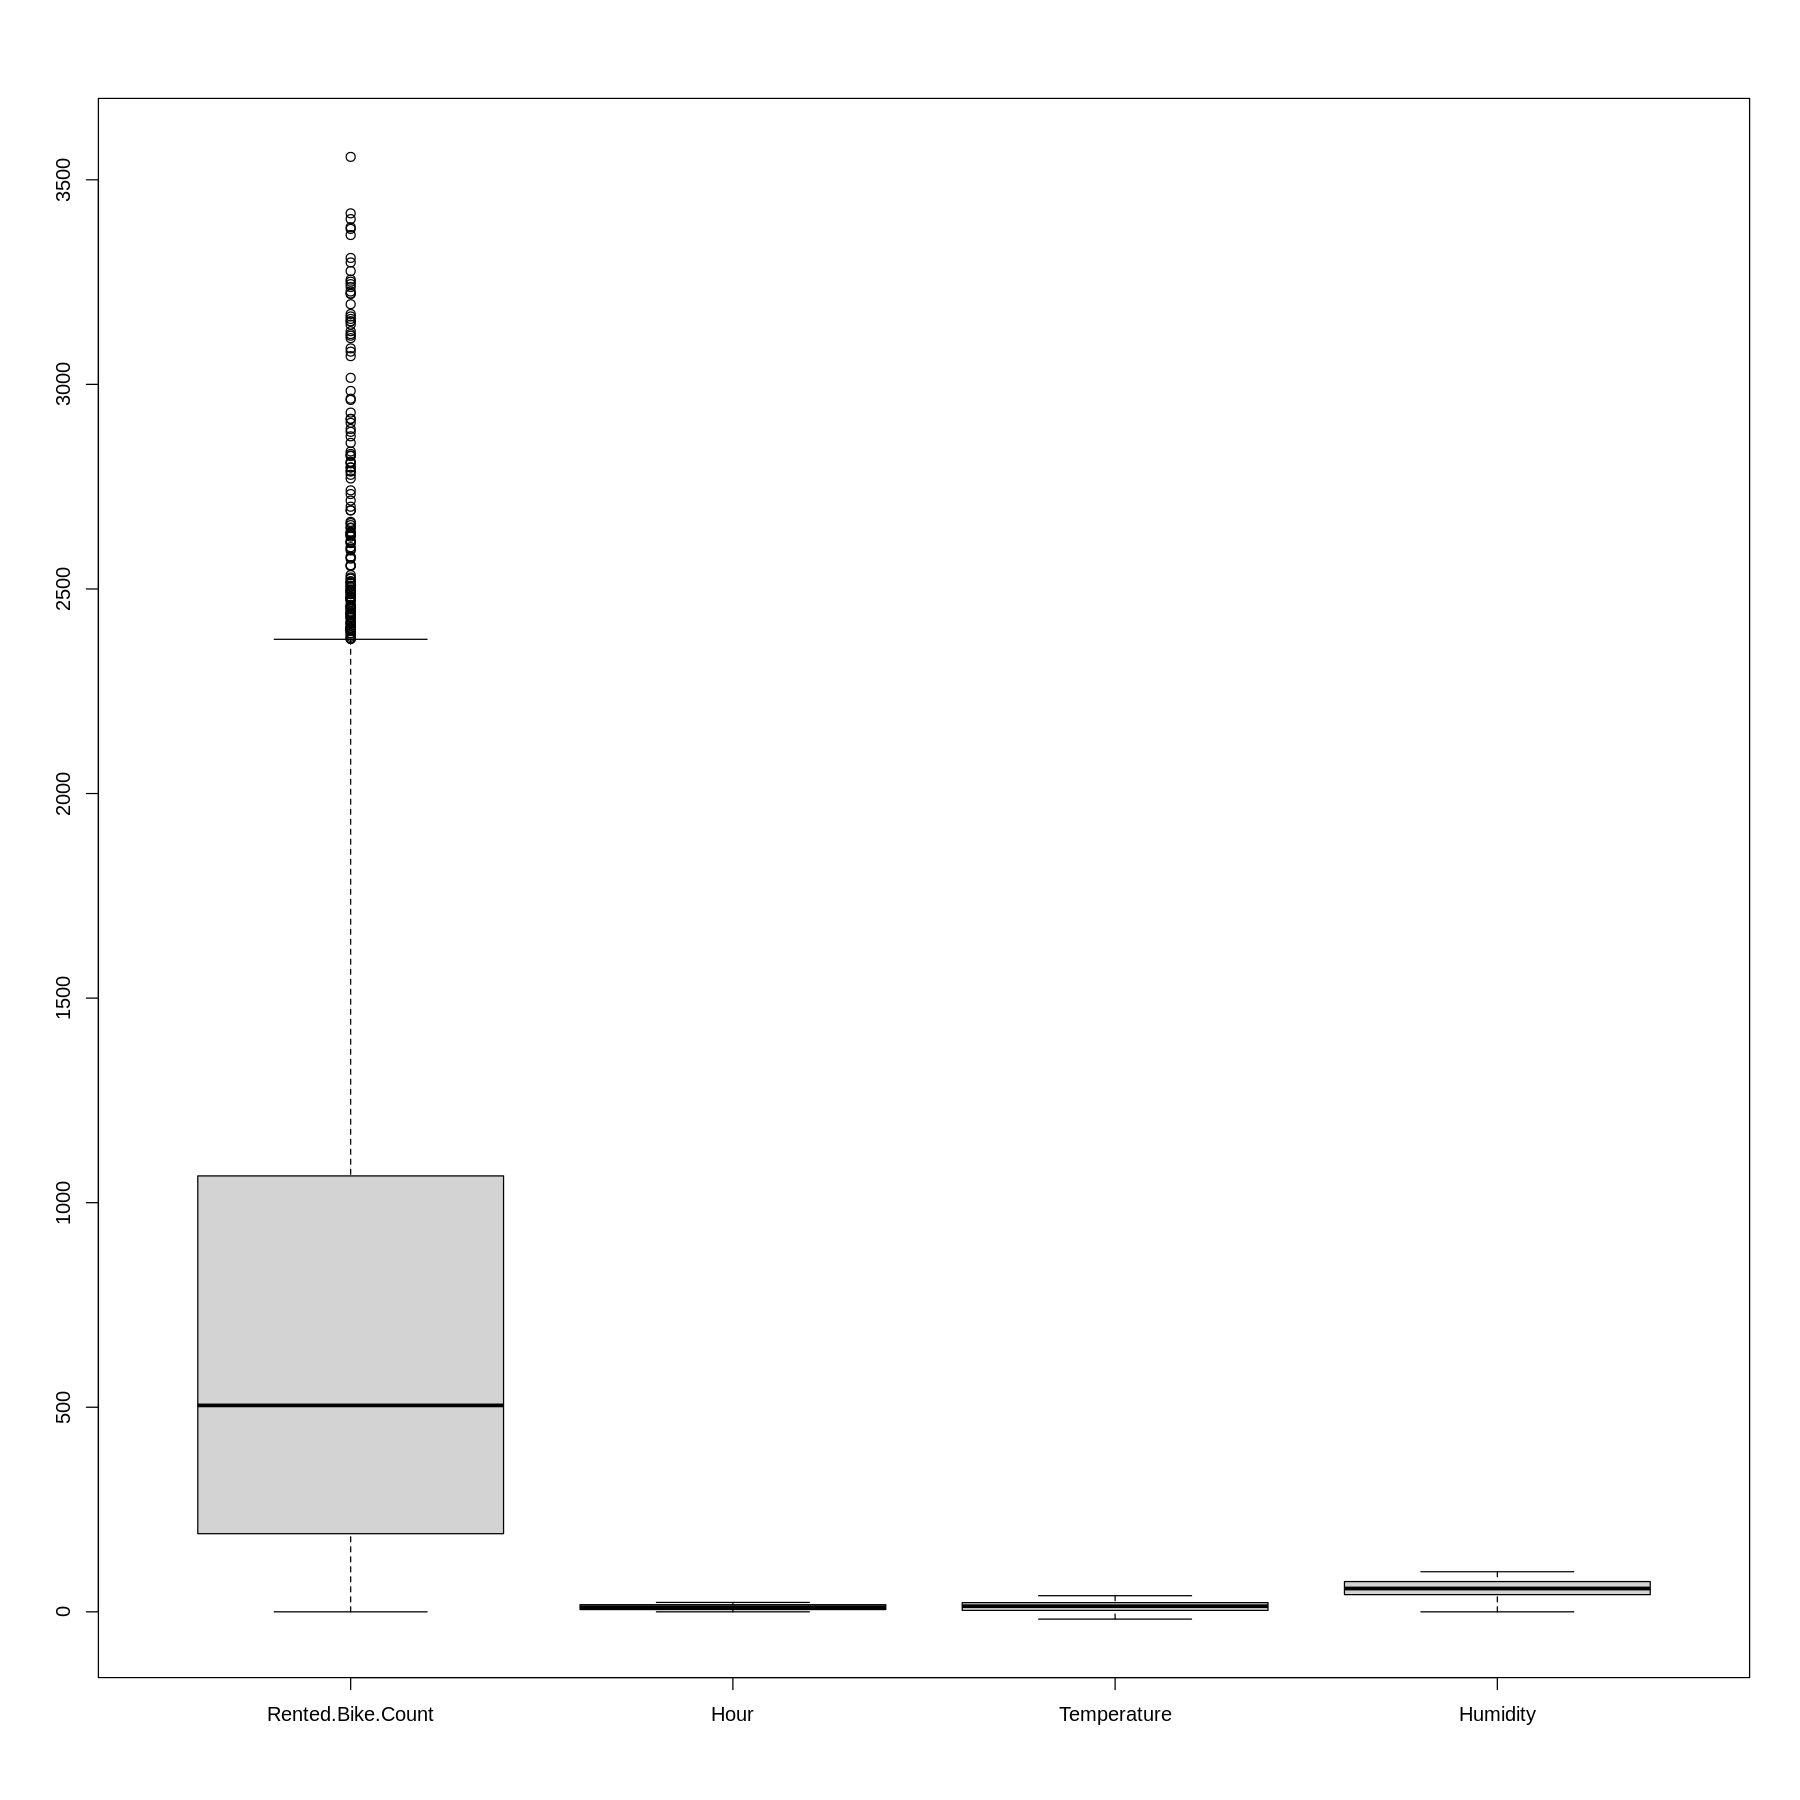

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
boxplot(linear_bike_model)
#boxplot을 통해 이상값이 있는지 확인해 보았습니다. 
#Rented.Bike.Count의 이상값이 존재하지만 반응변수로 이미 교수님께서 집어주셨으며,
# 수업에서도 따로 이상값을 처리하지 않았기 때문에 이상값이 있다! 정도만 확인하고 넘어가겠습니다.

* 적절한 반응변수와 설명변수의 설정

```
반응변수 : Rented.Bike.Count // 이번 실습에서의 반응변수는 Rented.Bike.Count이다.
설명변수 : Hour, Temperature, Humidity
설정한 이유 : 위에서 본 상관관계/산점도 그래프에서 가장 높은 연관성을 가진 2개와
      개인적인 견해로 습도가 높은 날은 비가 온다고 생각이 되었기 때문에 
      음의 연관성을 가지지 않을까 하여 습도를 골랐습니다. 제 견해가 맞는지 확인해 보고 싶었습니다.

      이 3개의 값들은 이상값 또한 없기 때문에 이렇게 3개를 뽑았습니다.
```

* Train / Test set 분리 후 회귀식 추정

In [ ]:
# "caTools::sample.split", "caret:"sample.split", "lm" 활용
set.seed(51)
index <- caret::createDataPartition(y = linear_bike_model$Rented.Bike.Count, p = 0.8,list = FALSE)
train_linear <- linear_bike_model[index,]
test_linear <- linear_bike_model[-index,]

linear_Hour <- lm(formula = Rented.Bike.Count ~ Hour, data = train_linear)
linear_Temperature <- lm(formula = Rented.Bike.Count ~ Temperature, data = train_linear)
linear_Humidity <- lm(formula = Rented.Bike.Count ~ Humidity, data = train_linear)

* 회귀분석 결과 해석(이론 강의 참고)


In [ ]:
# "summary", "plotRelWeights" 활용
print("Rented.Bike.Count ~ Hour")
summary(linear_Hour)

[1] "Rented.Bike.Count ~ Hour"



Call:
lm(formula = Rented.Bike.Count ~ Hour, data = train_linear)

Residuals:
    Min      1Q  Median      3Q     Max 
-1136.7  -397.7  -101.0   324.7  2607.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  270.991     13.684   19.80   <2e-16 ***
Hour          37.640      1.017   37.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 589.7 on 7007 degrees of freedom
Multiple R-squared:  0.1635,	Adjusted R-squared:  0.1634 
F-statistic:  1370 on 1 and 7007 DF,  p-value: < 2.2e-16


* linear_hour에서 ``β0 = 270.991, β1 = 37.64 으로부터 
Rented.Bike.Count = 270.991 + 37.64 * Hour`` 라는 회귀식 도출

* Hour가 1 증가할 때마다 Rented.Bike.Count는 37.64만큼 증가

In [ ]:
print("Rented.Bike.Count ~ Temperature")
summary(linear_Temperature)

[1] "Rented.Bike.Count ~ Temperature"



Call:
lm(formula = Rented.Bike.Count ~ Temperature, data = train_linear)

Residuals:
     Min       1Q   Median       3Q      Max 
-1098.26  -335.66   -50.53   233.72  2527.27 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 330.4960     9.5910   34.46   <2e-16 ***
Temperature  28.9722     0.5451   53.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 544.4 on 7007 degrees of freedom
Multiple R-squared:  0.2873,	Adjusted R-squared:  0.2872 
F-statistic:  2825 on 1 and 7007 DF,  p-value: < 2.2e-16


* linear_Temperature에서 ``β0 = 330.496, β1 = 28.9722 으로부터 
Rented.Bike.Count = 330.496 + 28.9722 * Temperature`` 라는 회귀식 도출

* Temperature가 1 증가할 때마다 Rented.Bike.Count는 28.9722만큼 증가

In [ ]:
print("Rented.Bike.Count ~ Humidity")
summary(linear_Humidity)

[1] "Rented.Bike.Count ~ Humidity"



Call:
lm(formula = Rented.Bike.Count ~ Humidity, data = train_linear)

Residuals:
   Min     1Q Median     3Q    Max 
-960.7 -468.6 -177.7  331.0 2843.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1073.732     22.806   47.08   <2e-16 ***
Humidity      -6.335      0.370  -17.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 631.7 on 7007 degrees of freedom
Multiple R-squared:  0.04016,	Adjusted R-squared:  0.04003 
F-statistic: 293.2 on 1 and 7007 DF,  p-value: < 2.2e-16


* linear_Humidity에서 ``β0 = 1073.732, β1 = -6.335 으로부터 
Rented.Bike.Count = 1073.732 + -6.335 * Humidity`` 라는 회귀식 도출

* Humidity가 1 증가할 때마다 Rented.Bike.Count는 -6.335만큼 감소

* Feature selection(변수 선택)

In [ ]:
# "lm", "update", "step" 활용
# Hour, Temperature, Humidity의 각각 Adjusted R-squared 값은
# 0.1634    0.2872   0.04003 이다.
# 따라서 정확도가 너무 낮은 Humidity를 빼고 새로는 회기식 lm을 구성하겠습니다.

#변수가 2개 뿐이라 step함수를 사용하는게 의미가 없어서 hour, temperature만 가지고 predict를 진행하겠습니다.
linear_Hour <- lm(formula = Rented.Bike.Count ~ Hour, data = train_linear)
linear_Temperature <- lm(formula = Rented.Bike.Count ~ Temperature, data = train_linear)

* Test set을 이용한 Predict(예측)

In [ ]:
# "predict" 활용 

#linear_bike_model 의 결과 


predict_linear_hour_bike <- predict_hour_bike_value <- predict(linear_Hour, test_linear, type = "response") %>% tibble(predict_hour_bike_value = .)
predict_linear_Temperature_bike <- predict_Temperature_bike_value <- predict(linear_Temperature, test_linear, type = "response") %>%
 tibble(predict_Temperature_bike_value = .)

test_linear_rent_bike <- test_linear %>% select(Rented.Bike.Count)


predict_lienar_bike <- predict_linear_hour_bike %>% mutate(test_linear_rent_bike, predict_linear_Temperature_bike) 
predict_lienar_bike

#중간에 test데이터의 자전거 렌트 수를 집어 넣어 양쪽의 예측 결과와 비교할 수 있게 하였습니다.
#단순분석회기의 경우 정확도는 떨어지지만 음의 데이터는 나오지않았습니다. 

predict_hour_bike_value,Rented.Bike.Count,predict_Temperature_bike_value
<dbl>,<int>,<dbl>
270.9913,254,179.8406
346.2718,173,156.6628
459.1925,100,145.0740
609.7534,490,142.1768
647.3936,339,229.0933
722.6741,449,379.7488
760.3143,451,400.0293
873.2350,484,365.2627
910.8753,555,353.6738


#  ### **1-2. 다중회귀분석 (50점)** **굵은 텍스트**

In [ ]:
#변수 선택 전 summary와 str로 SeoulBikeData.csv의 데이터를 속성을 확인 
summary(bike)
str(bike)

     Date           Rented.Bike.Count      Hour        Temperature    
 Length:8760        Min.   :   0.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 191.0    1st Qu.: 5.75   1st Qu.:  3.50  
 Mode  :character   Median : 504.5    Median :11.50   Median : 13.70  
                    Mean   : 704.6    Mean   :11.50   Mean   : 12.88  
                    3rd Qu.:1065.2    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    Humidity       Wind.speed      Visibility   Dew.point.temperature
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 Solar.Radiat

'data.frame':	8760 obs. of  14 variables:
 $ Date                 : chr  "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ Rented.Bike.Count    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Hour                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ Wind.speed           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ Dew.point.temperature: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ Solar.Radiation      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ Functioning

* 선택한 데이터의 Attribute(속성 또는 열)에 대한 설명
저는 이번 다중회기분석에서 교수님께서 수업시간에 알려주신

.1.All Possible regressions

.2. Forward stepwise selection

.3. Backward stepwise selection 

중에서 Backward stepwise selection 방법과 비슷하게 실습을 진행해보려고 노력했습니다.

그 이유는 실습에서 youtube, facebook, newspaper 중에서 p_value값이 낮은 newspaper값이 빠졌던 것 처럼 저도 모든 값을 찾아보고 그 중에서 값이 낮은 속성을 제거하려고 하였습니다.

```
Rented.Bike.Count : 시간마다 렌트 된 바이크의 수
Hour : 시간대
Temperature : 섭씨 온도
Humidity : 습도
Windspeed : 풍속
Visibility : 가시거리
Dew Point temperature : 이슬점 온도 / 공기중의 수분이 포화되어 물방울로 맺히기 시작하는 온도
Solar radiation : 태양의 복사열
Rainfall : 강우량
snowfall : 강설량

Date, Seasons, Holiday, Functional Day 는 범주형 혹은 문자형 데이터로써
처리가 까다롭다 생각하여 제거를 하였습니다.

다른 변수들은 일단 모두 포함시킨 다음. lm 함수를 구하고, step 과정을 거쳐
p_value 값이 낮은 변수들을 제거하도록 하겠습니다.

```

In [ ]:
bike_simple_data <- select(bike, -Seasons, -Holiday, -Functioning.Day, -Date) 
bike_simple_data %>% as_tibble() %>% show()
#우선 문자형 데이터와 범주형 데이터는 제거하였습니다.

# A tibble: 8,760 × 10
   Rented.Bike.Count  Hour Temperature Humidity Wind.speed Visibility
               <int> <int>       <dbl>    <int>      <dbl>      <int>
 1               254     0        -5.2       37        2.2       2000
 2               204     1        -5.5       38        0.8       2000
 3               173     2        -6         39        1         2000
 4               107     3        -6.2       40        0.9       2000
 5                78     4        -6         36        2.3       2000
 6               100     5        -6.4       37        1.5       2000
 7               181     6        -6.6       35        1.3       2000
 8               460     7        -7.4       38        0.9       2000
 9               930     8        -7.6       37        1.1       2000
10               490     9        -6.5       27        0.5       1928
# … with 8,750 more rows, and 4 more variables: Dew.point.temperature <dbl>,
#   Solar.Radiation <dbl>, Rainfall <dbl>, Snowfall <dbl>


\* scatter plot(산점도), boxplot 등 시각화하여 각 Attribute의 값에 대한 설명

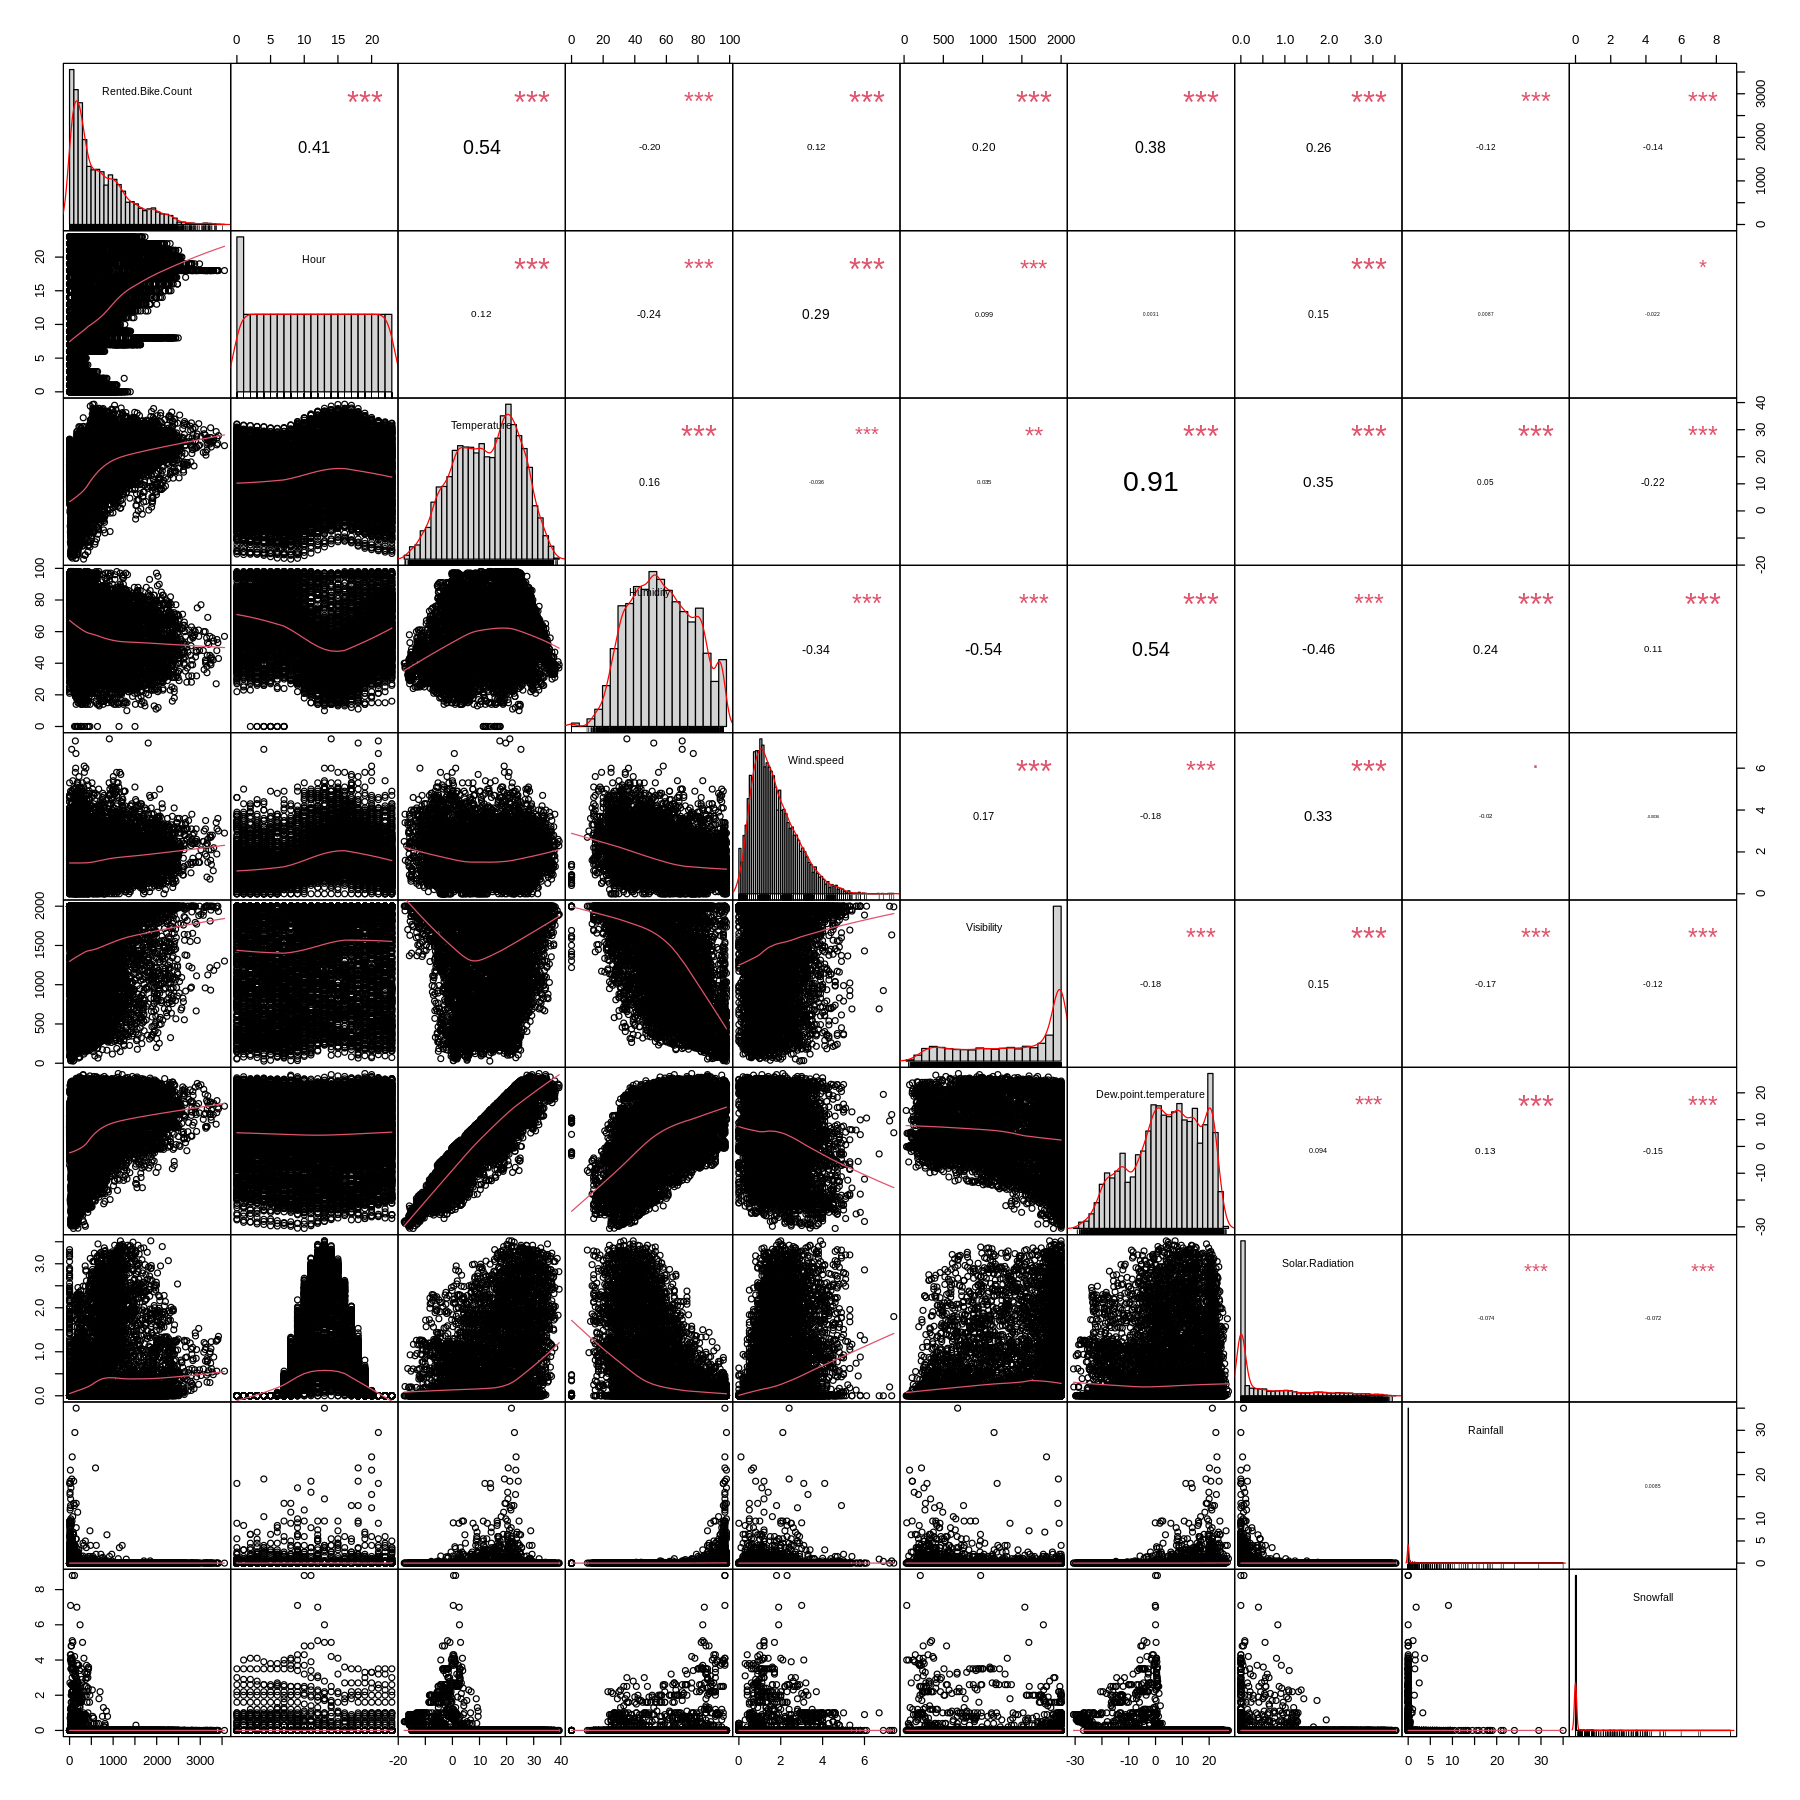

In [ ]:
# "scatterplot3d", "plotly","PerformanceAnalytics", "boxplot" 활용
# 변수가 많으므로, scatterplot3d는 그리지 않겠습니다
# 상관계수와 산점도를 동시에 그릴 수 있는 PerformanceAnalytics를 사용하여 그리겠습니다. 

PerformanceAnalytics::chart.Correlation(bike_simple_data, histogram = TRUE, pch = 19)

#위에서 Date, Season, Holiday, Functional Day 속성을 제거하였으므로 PerformanceAnalytics의 속성은
#Rented.Bike.Count, Hour, Temperature, Humidity, Wind.speed, Visibility, Dew.point.temperature, Solar.Radiation, Rainfall, Snowfall
# 10 x 10 으로 이루어져 있다.

#실습에서 반응변수(종속변수)는 이미 Rented.Bike.Count로 이루어져 있으므로, Rented.Bike.Count에 대해서만 상관계수를 살펴보면
#Temperature -> Hour -> Dew.point.temperature .. 순으로 높다.

#PerformanceAnalytics에서 0.91로 가장 높은 상관계수 수치를 보여주는 경우는 Temperature와 Dew.point.temperature의 관계로
# 각각 섭씨온도와, 이슬이 맺히는 온도로 상당한 연관성이 있다고 생각하는데, 수치 또한 높은 연관성이 있다고 보여주고 있습니다.

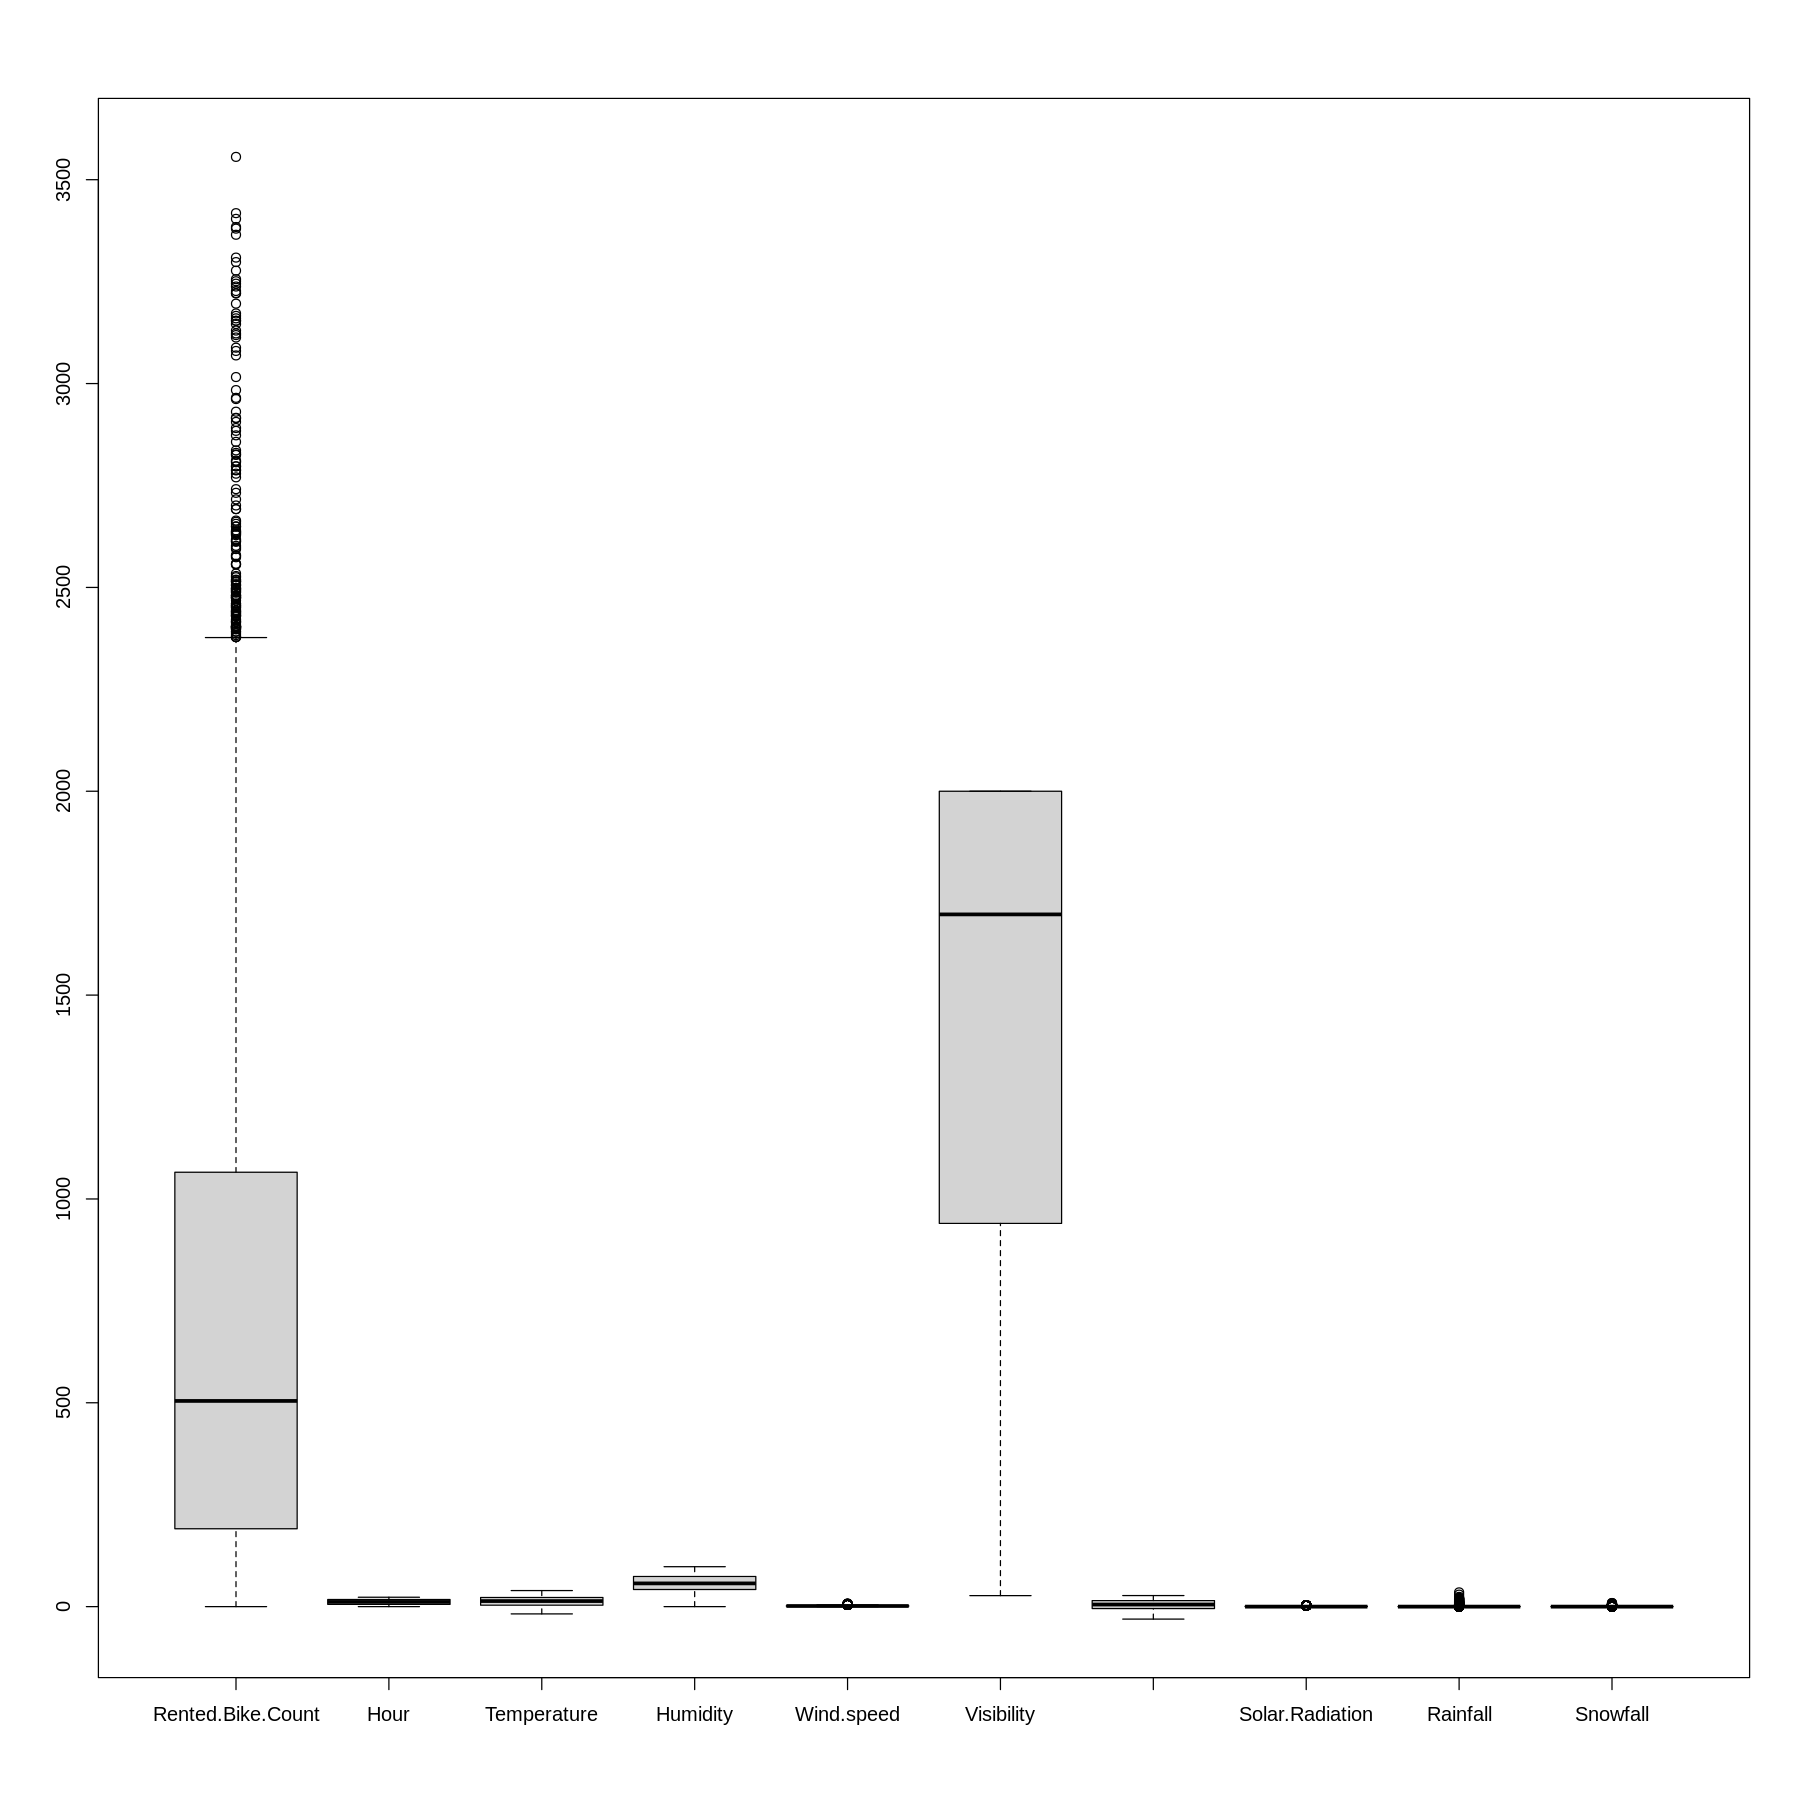

In [ ]:
boxplot(bike_simple_data)

#이상값이 있는지 확인하기 위해 bike_simple_data를 boxplot으로 찍어보았습니다.
# 그 결과 반응변수(종속변수) 인 Rented.Bike.Count에서 이상값이 많이 발견되었습니다.
# 위의 PerformanceAnalytics에서 보면 Rented.Bike.Count의 분포가 낮은쪽으로 치우친걸 볼 수 있습니다.
# 따라서 이런 이상값이 발견되었다고 생각합니다. 

# 그 외에도 Wind.speed, Solar.Radiation, Rainfall, Snowfall 에서 이상값이 발견되었습니다.

# 단순/다중 회기 분석에서 이상값 처리를 하지 않았으므로, 이상값이 있다! 정도만 확인하고 넘어가였습니다.

* 적절한 반응변수와 설명변수의 설정

```
반응변수 : Rented.Bike.Count // 이번 실습에서의 반응변수는 Rented.Bike.Count이다.
설명변수 : Hour, Temperature, Dew.point.temperature
설정한 이유 : 위에서 본 상관관계/산점도 그래프에서 가장 높은 연관성을 가진 3개를 뽑았습니다.
              이 3개의 값들은 이상값 또한 없기 때문에 이렇게 3개를 뽑았습니다.
          
          밑의 lm에서는 여기서 생각한 적절한 설명변수 3개만 넣는 것이 아닌
            bike_simple_linear의 Rented.Bike.Count를 제외한 모든 속성을 넣고
              lm 함수를 적용 summary로 결과를 보았을 때 맞는지 확인해 보겠습니다.

              Backward stepwise selection 방법 처럼 하고자 노력했습니다.
```

* Train / Test set 분리 후 회귀식 추정

In [ ]:
# "caTools::sample.split", "caret:"sample.split", "lm" 활용
set.seed(51)
index <- caret::createDataPartition(y = bike_simple_data$Rented.Bike.Count, p = 0.8, list = FALSE)
train <- bike_simple_data[index,]
test <- bike_simple_data[-index,]

#2개의 회기식 중 어떤 회기식이 더 설명율이 높은지 확인하기 위해 범주형,문자형 데이터를 모두 제외하고 넣은 bike_model_backward 입니다.
#backward_stepwise_selection 방식과 비슷하게 사용하기 위해 모든 설명변수를 집어넣었습니다.
bike_model_backward <- lm (Rented.Bike.Count ~ Hour + Temperature + Humidity + Wind.speed + Visibility +
 Dew.point.temperature + Solar.Radiation + Rainfall + Snowfall, data = train)

#제가 상관계수가 높다고 생각되는 3개의 설명변수만 골라서 bike_model_three를 완성하였습니다.
bike_model_three <- lm (Rented.Bike.Count ~ Hour + Temperature + Dew.point.temperature, data = train)

* 회귀분석 결과 해석(이론 강의 참고)


In [ ]:
# 변수의 상대적 중요도 파악
# https://rpubs.com/cardiomoon/152770
factor2number=function(df){
    select=sapply(df,function(x) {is.factor(x)})
    if(sum(select)==1) df[[which(select)]]<-as.numeric(df[[which(select)]])
    else if(sum(select)>1) df[,select]<-lapply(df[,select],as.numeric)
    df
}

chr2factor=function(df){
    select=sapply(df,function(x) {is.character(x)})
    df[,select]<-lapply(df[,select],factor)
    df
}

relweights <- function(fit,plot=FALSE,...){
    df<-fit$model
    df1<-chr2factor(df)
    df2<-factor2number(df1)
    
    R <- cor(df2)
    nvar <- ncol(R)
    rxx <- R[2:nvar, 2:nvar]
    rxy <- R[2:nvar, 1]
    svd <- eigen(rxx)
    evec <- svd$vectors
    ev <- svd$values
    delta <- diag(sqrt(ev))
    lambda <- evec %*% delta %*% t(evec)
    lambdasq <- lambda ^ 2
    beta <- solve(lambda) %*% rxy
    rsquare <- colSums(beta ^ 2)
    rawwgt <- lambdasq %*% beta ^ 2
    import <- (rawwgt / rsquare) * 100
    import <- as.data.frame(import)
    row.names(import) <- names(fit$model[2:nvar])
    names(import) <- "Weights"
    import <- import[order(import),1, drop=FALSE]
    if(plot) {
        dotchart(import$Weights, labels=row.names(import),
                 xlab="% of R-Square", pch=19,
                 main="Relative Importance of Predictor Variables",
                 sub=paste("Total R-Square=", round(rsquare, digits=3)),
                 ...)
    }  
    attr(import,"R-square")<-round(rsquare, digits=3)
    return(import)
}

plotRelWeights=function(fit){
       data<-relweights(fit)
       data$Predictors<-rownames(data)
       p<-ggplot(data=data,aes(x=reorder(Predictors,Weights),y=Weights,fill=Predictors))+ 
           geom_bar(stat="identity",width=0.5)+
           ggtitle("Relative Importance of Predictor Variables")+
           ylab(paste0("% of R-square \n(Total R-Square=",attr(data,"R-square"),")"))+
           geom_text(aes(y=Weights-0.1,label=paste(round(Weights,1),"%")),hjust=1)+
           guides(fill=FALSE)+
           coord_flip()
       p
   }




Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1401.42  -288.11   -43.31   225.64  2295.01 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           521.93374  110.86935   4.708 2.55e-06 ***
Hour                   26.72868    0.88275  30.279  < 2e-16 ***
Temperature            28.65633    4.35710   6.577 5.15e-11 ***
Humidity               -8.49577    1.23256  -6.893 5.95e-12 ***
Wind.speed              8.66709    6.13506   1.413   0.1578    
Visibility              0.01721    0.01163   1.480   0.1388    
Dew.point.temperature   3.36728    4.58645   0.734   0.4629    
Solar.Radiation       -82.94930    9.22653  -8.990  < 2e-16 ***
Rainfall              -67.25550    5.61306 -11.982  < 2e-16 ***
Snowfall               25.03876   13.40139   1.868   0.0

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”



Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature + Dew.point.temperature, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1390.1  -294.4   -52.1   219.7  2368.2 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -166.6712    14.3533  -11.61   <2e-16 ***
Hour                    26.9618     0.8706   30.97   <2e-16 ***
Temperature             50.9773     1.2357   41.25   <2e-16 ***
Dew.point.temperature  -23.9564     1.1197  -21.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 482.6 on 7005 degrees of freedom
Multiple R-squared:  0.4401,	Adjusted R-squared:  0.4398 
F-statistic:  1835 on 3 and 7005 DF,  p-value: < 2.2e-16


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


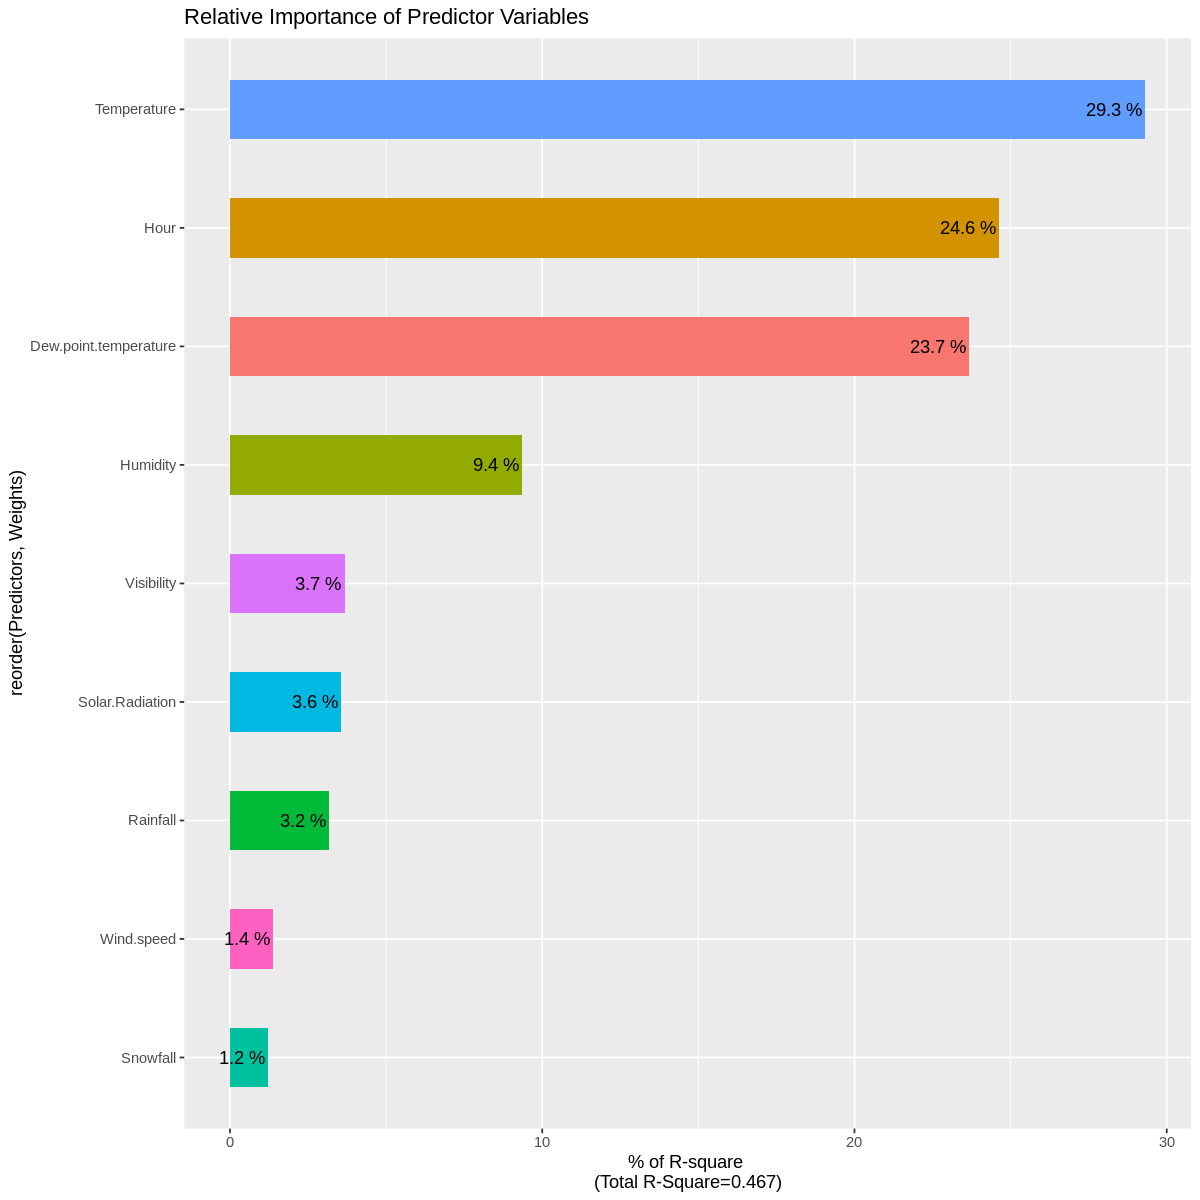

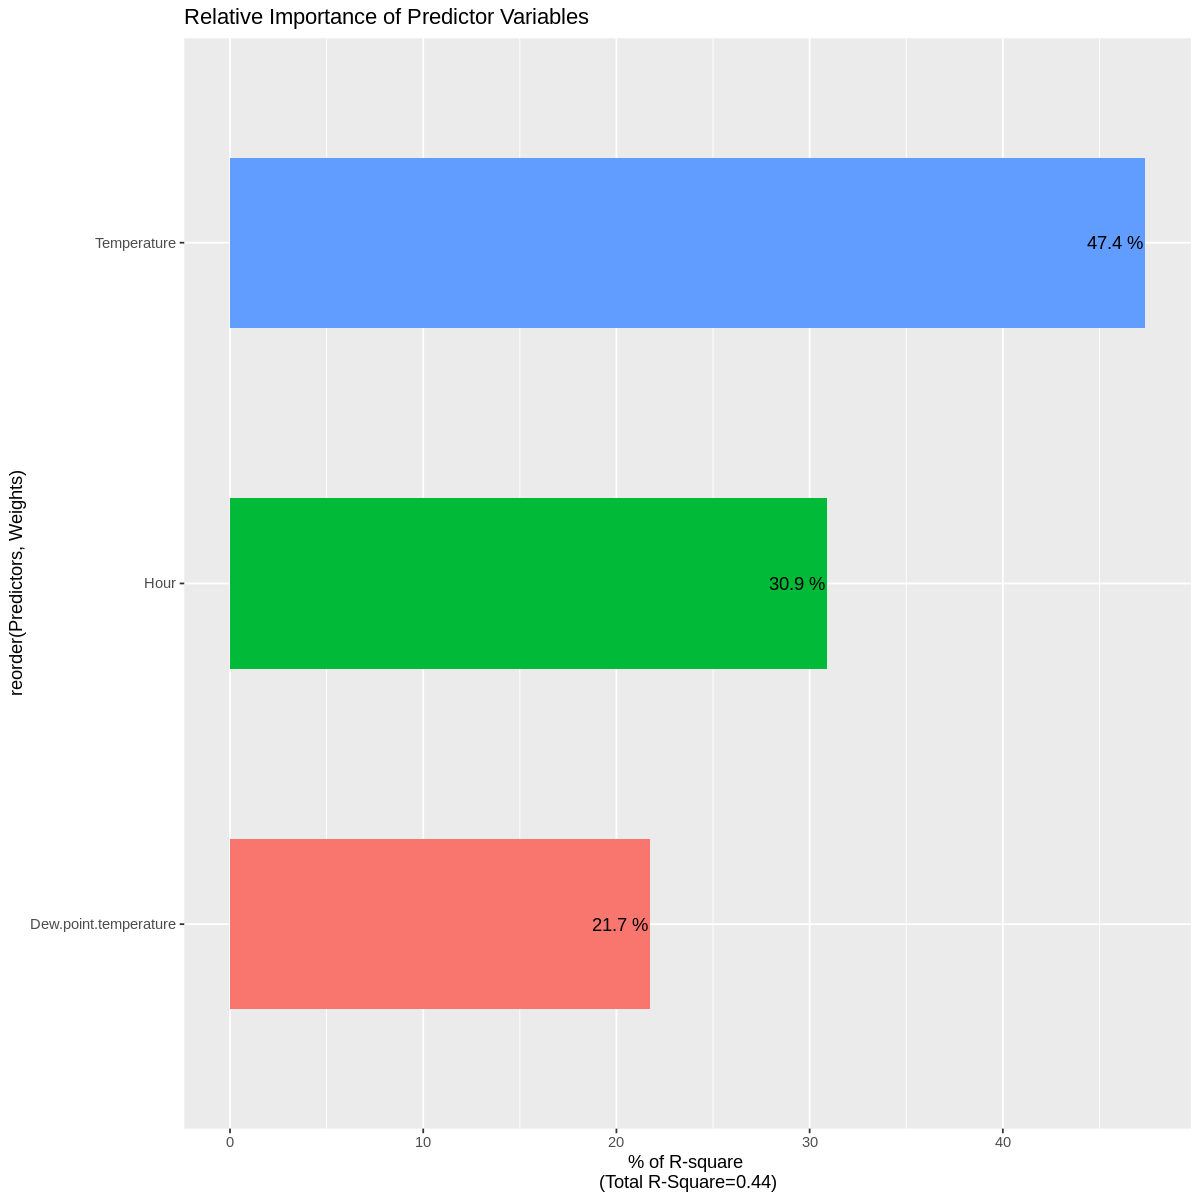

In [ ]:
# "summary", "plotRelWeights" 활용
options(repr.plot.width=10, repr.plot.height=10)

summary(bike_model_backward)
plotRelWeights(bike_model_backward)

summary(bike_model_three)
plotRelWeights(bike_model_three)

#summary에서 bike_model_backward와 bike_model_three의 p_value값을 확인해보았습니다.
#확인 결과 bike_model_backward에서는 제가 고른 Dew.point.temperature의 p_value 값이 높게 나온 것을 볼 수 있습니다.

#plotRelWeights에서는 Dew.point.temperature 비중이 23.7로 높게 나와서 처음에는 많이 당황했습니다.
#ROC 커브를 그려 AUC 값을 구해야 하는지 아니면 기존 Rented.Bike.count와 predict_Rented.Bike.Count의 차이를 구해야 하는지,
#여러 시도를 해보았습니다. 

#p_value 값이 높은데, 비중은 높다는 말이 이해가 가지 않아 직접 조합을 해보면서 
#최적의 Multiple R-squared	Adjusted R-squared를 찾는 것이 정답인 것 같다 생각하여 
#최적의 Multiple R-squared, Adjusted R-squared값을 구하였습니다.

#bike_model_backward는 각각 0.4674, 0.4667의 값을 나타내며,
#bike_model_three는 각각 0.4401, 0.4398의 정확도를 나타냅니다.

###Dew.point.Temperature의 비중이 높게 나온 이유가 무엇일까 생각해보았습니다.

Dew.point.Temperauture와 Temperature가 높은 상관관계가 있다고 생각합니다.

Temperature는 이슬점 온도는 온도에 비례합니다. 위에서 PerformanceAnalytics로 산포도와 상관관계를 구한 그래프에서도 0.91의 높은 상관관계를 보여주고 있습니다

교수님께서 다중공산성 문제 때문에 독립변수들은 서로 상호간의 낮은 상관관계를 가져야 한다고 하셨습니다. 따라서 다중공산성 때문에 이런 문제가 발생하였으며 Dew.point.temperature는 제거하는 것이 맞다고 생각이 들었습니다.


* Feature selection(변수 선택)

Start:  AIC=86284.64
Rented.Bike.Count ~ Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall

                        Df Sum of Sq        RSS   AIC
- Dew.point.temperature  1    119506 1551865404 86283
- Wind.speed             1    442480 1552188378 86285
<none>                               1551745898 86285
- Visibility             1    485840 1552231738 86285
- Snowfall               1    773946 1552519844 86286
- Temperature            1   9590271 1561336169 86326
- Humidity               1  10533470 1562279368 86330
- Solar.Radiation        1  17919807 1569665705 86363
- Rainfall               1  31830304 1583576202 86425
- Hour                   1 203267566 1755013464 87145

Step:  AIC=86283.18
Rented.Bike.Count ~ Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Solar.Radiation + Rainfall + Snowfall

                  Df Sum of Sq        RSS   AIC
- Wind.speed       1    429009 1552294413 8


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature + Humidity + 
    Visibility + Solar.Radiation + Rainfall + Snowfall, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1395.85  -287.33   -43.85   224.78  2307.30 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     458.08206   40.49193  11.313   <2e-16 ***
Hour             26.99148    0.85569  31.543   <2e-16 ***
Temperature      31.70378    0.59545  53.244   <2e-16 ***
Humidity         -7.68531    0.44030 -17.455   <2e-16 ***
Visibility        0.01872    0.01158   1.616   0.1061    
Solar.Radiation -81.37574    8.69371  -9.360   <2e-16 ***
Rainfall        -67.44064    5.57255 -12.102   <2e-16 ***
Snowfall         24.43188   13.36613   1.828   0.0676 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.9 on 7001 degrees of freedom
Multiple R-squared:  0.4672,	Adjusted R-squared:  0.4667 
F-statistic:   877 on 7 and 7001

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”



Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Solar.Radiation + Rainfall, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1400.36  -290.72   -42.95   225.45  2298.30 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     443.67696   41.32917  10.735   <2e-16 ***
Hour             26.77181    0.88076  30.396   <2e-16 ***
Temperature      31.55041    0.58264  54.151   <2e-16 ***
Humidity         -7.53018    0.43604 -17.269   <2e-16 ***
Wind.speed        8.59536    6.13293   1.402    0.161    
Visibility        0.01726    0.01160   1.489    0.137    
Solar.Radiation -82.85528    8.93510  -9.273   <2e-16 ***
Rainfall        -67.98224    5.57515 -12.194   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.9 on 7001 degrees of freedom
Multiple R-squared:  0.4671,	Adjusted R-squared:  0.4666 
F-statistic: 876.7 on 7 and 70

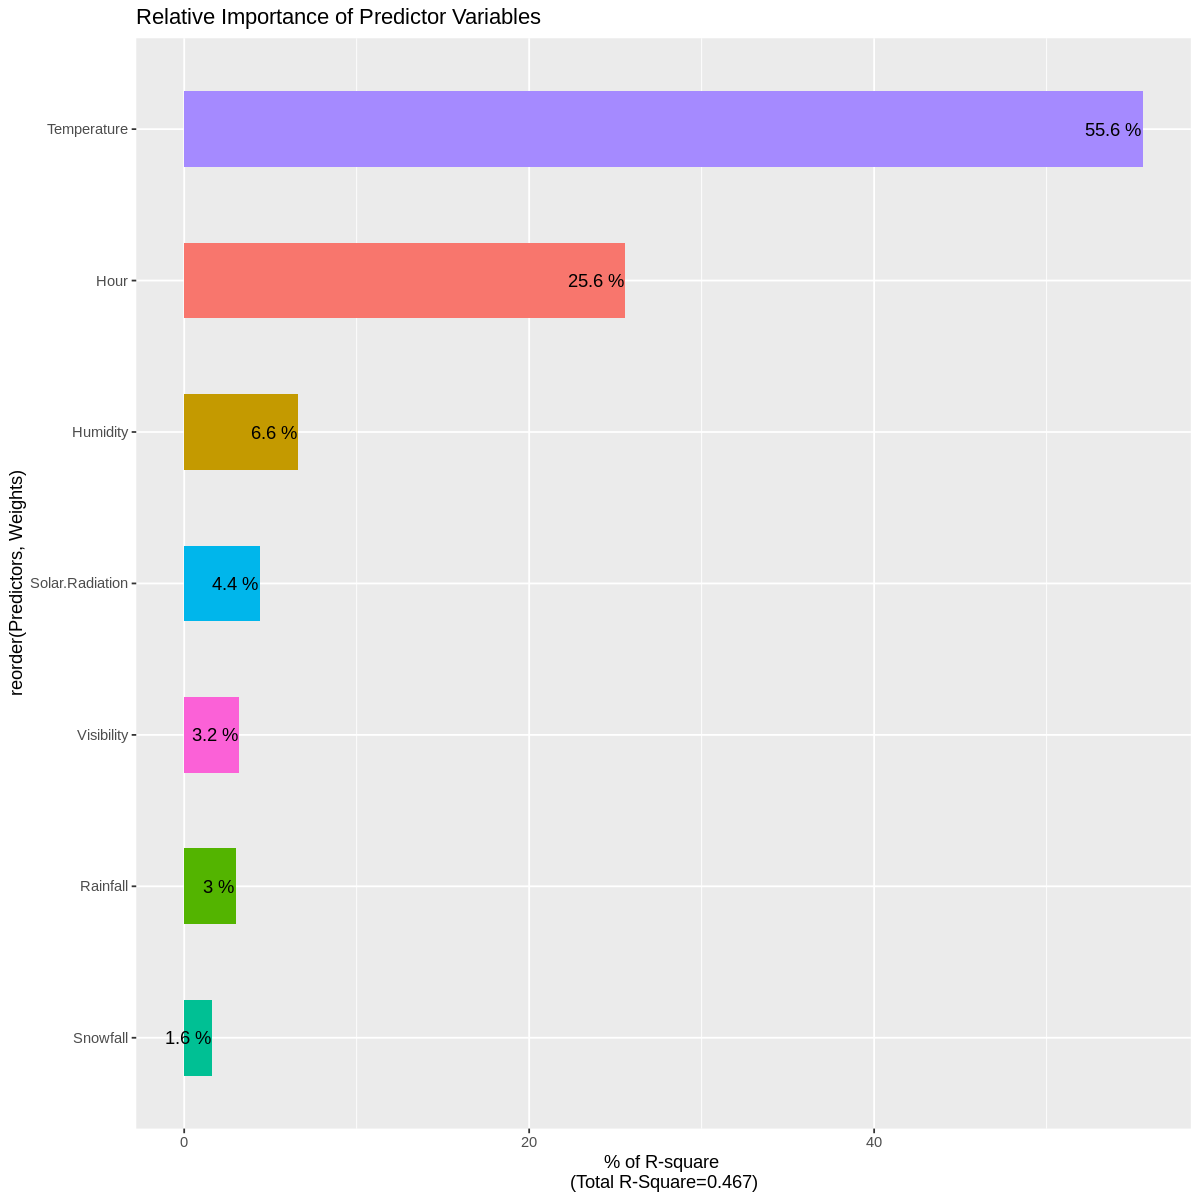

In [ ]:
# "lm", "update", "step" 활용

#p_value값이 높은 속성을 자동으로 제거해주는 step의 backward를 사용하였습니다. 
bike_backward <- step(bike_model_backward, direction = "backward")
summary(bike_backward)
plotRelWeights(bike_backward)
#그 결과 bike_model_backward에서 p_value값이 높았던 Dew.point.temperature를 제거되었습니다.

#lm 함수를 사용하여 p_value 값이 높은 snowfall도 제거해 보았습니다.
#summary 출력 결과를 보시면 Multiple R-squared 값이 아주 조금 떨어진 것을 볼 수 있습니다. 0.4672 ->  0.4671
#seed 함수를 적용하지 않아 출력값이 다르게 보이실 수 있습니다. -> 수정하였습니다. set.seed(51)을 적용하여 고정시켰습니다.
bike_model_exam <- lm (Rented.Bike.Count ~ Hour + Temperature + Humidity + Wind.speed + Visibility +
 Solar.Radiation + Rainfall, data = train)
summary(bike_model_exam)

#따라서 step을 통해 Dew.point.Temperature가 제거된 값이 최적의 Multiple R-squared값인 것을 확인 할 수 있었습니다.

#추가적으로 여기에 소스코드를 적지는 않았지만 lm함수를 통해 여러개의 특성을 조합해본 결과 이 조합이 가장 Multiple R-squared 높았었습니다.

* Test set을 이용한 Predict(예측)

In [ ]:
test_rent_bike <- test %>% select(Rented.Bike.Count)
test_rent_bike %>% head()

,Rented.Bike.Count
,<int>
1,254
3,173
6,100
10,490
11,339
13,449


In [ ]:
# "predict" 활용

#이제 predict를 통해 출력을 해보았습니다.
#test 데이터의 결과를 출력하였으므로 원래 test 데이터와 비교하기 위해 mutate를 통해 새로운 열을 만들어 비교를 하였습니다.
predict_bike <- predict_bike_value <- predict(bike_backward, test, type = "response") %>% tibble(predict_bike_value = .)
predict_bike <- predict_bike %>% mutate(test_rent_bike)
predict_bike

#단순회기분석 보단 정확도가 두배 정도 올라갔지만, 음수가 나오는 경우를 볼 수 있습니다. 이 부분은 수정이 필요하다 생각됩니다.
#이상입니다.

predict_bike_value,Rented.Bike.Count
<dbl>,<int>
46.29585,254
59.54515,173
143.20871,100
304.79348,490
417.04706,339
606.21701,449
635.96172,451
508.29415,484
527.47202,555
